# Visualize with our Viewer

The real-time web viewer enables communication between Python and the ReactJS Client Viewer Application. Here we provide a walkthrough for how to use the viewer to draw information as well as read information from the GUI.


In [95]:
# HIDDEN
%load_ext autoreload
%autoreload 2
import pprint
import torch
import numpy as np
import torch
import mediapy as media
from nerfactory.data.structs import SceneBounds
from nerfactory.cameras.cameras import PinholeCamera
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Open the Nerfviewer client

Open the Nerfviewer client by visiting [http://nerfviewer.plenoptix.ai/](http://nerfviewer.plenoptix.ai/0) or running the code locally. *We refer to [this document]() for running the code locally.* You should see a GUI like the following:

```{image} imgs/nerfviewer.png
:align: center
:class: only-light
:width: 600
```


## Start the Bridge Server

Run the following code in the repository home directory

```
python scripts/run_viewer_bridge_server.py
```

This will start the bridge server that both the Python code and Client Viewer App will connect to.

Verify that the Client Viewer App is connected.

In [96]:
# from IPython.display import HTML

# url="http://localhost:4000/?localhost:18051"
# height = 500

# HTML("""
# <div style="height: {height}px; width: 100%; overflow-x: auto; overflow-y: hidden; resize: both">
# <iframe src="{url}" style="width: 100%; height: 100%; border: none"></iframe>
# </div>
# """.format(url=url, height=height))

## Communicate with the Client Viewer App from Python

Run the following code in the repository home directory

```
python scripts/run_viewer_bridge_server.py
```

This will start the bridge server that both the Python code and Client Viewer App will connect to.

Verify that the Client Viewer App is connected.

In [97]:
# connect to the viewer from Python
from nerfactory.viewer.server.visualizer import Viewer

vis = Viewer(zmq_url="tcp://127.0.0.1:6000")

In [98]:
# draw scene bounds in the viewer
s = 1
scene_bounds = SceneBounds(aabb=torch.tensor([[-s, -s, -s], [s, s, s]]))
scene_bounds_json = scene_bounds.to_json()

# draw scene bounds in the viewer
vis["sceneState/sceneBounds"].write(scene_bounds_json)

# draw scene bounds in plotly
import plotly.graph_objects as go

# TODO:

/sceneState/sceneBounds


In [99]:
# HIDDEN
def get_random_rotation_matrix():
    roll = torch.randn(1)
    yaw = torch.randn(1)
    pitch = torch.randn(1)

    tensor_0 = torch.zeros(1)
    tensor_1 = torch.ones(1)

    RX = torch.stack([
                    torch.stack([tensor_1, tensor_0, tensor_0]),
                    torch.stack([tensor_0, torch.cos(roll), -torch.sin(roll)]),
                    torch.stack([tensor_0, torch.sin(roll), torch.cos(roll)])]).reshape(3,3)

    RY = torch.stack([
                    torch.stack([torch.cos(pitch), tensor_0, torch.sin(pitch)]),
                    torch.stack([tensor_0, tensor_1, tensor_0]),
                    torch.stack([-torch.sin(pitch), tensor_0, torch.cos(pitch)])]).reshape(3,3)

    RZ = torch.stack([
                    torch.stack([torch.cos(yaw), -torch.sin(yaw), tensor_0]),
                    torch.stack([torch.sin(yaw), torch.cos(yaw), tensor_0]),
                    torch.stack([tensor_0, tensor_0, tensor_1])]).reshape(3,3)

    R = torch.mm(RZ, RY)
    R = torch.mm(R, RX)
    return R

/sceneState/cameras


""

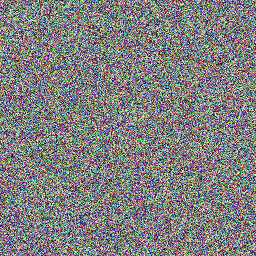

/sceneState/cameras/000000
/sceneState/cameras/000001


b'ok'

In [100]:
# delete any current cameras
vis[f"sceneState/cameras"].delete()

# draw a camera with with an image
image = torch.rand(256, 256, 3)
media.show_image(image)
camera = PinholeCamera(cx=100, cy=100, fx=50, fy=50)
camera_json = camera.to_json(image=image)
vis[f"sceneState/cameras/000000"].write(camera_json)

# draw a camera with rotation and translation (with a black image)
image = torch.zeros(256, 256, 3)
c2w = torch.eye(4)
c2w[:3,:3] = get_random_rotation_matrix()
random_translation = torch.rand(1) * 5
c2w[:3, 3] = random_translation
camera = PinholeCamera(cx=100, cy=100, fx=50, fy=50, camera_to_world=c2w)
camera_json = camera.to_json(image=image)
vis[f"sceneState/cameras/000001"].write(camera_json)

In [101]:
# delete a camera from the Nerfviewer
vis["sceneState/cameras/000000"].delete()

/sceneState/cameras/000000


b'ok'

## Read from the GUI sliders

In [102]:
# read the field of view
camera = vis[f"renderingState/camera"].read()
fov = camera["object"]["fov"]
print(fov)

80


In [103]:
fov = vis[f"renderingState/camera/object/fov"].read()
print(fov)


None


In [104]:
# set the field of view
camera = vis[f"renderingState/camera"].read()
fov = camera["object"]["fov"]

In [105]:
# read from a slider
vis[f"renderingState/minResolution"].read()

In [106]:
# read from a dropdown
output_options = vis[f"renderingState/output_options"].read()
print(output_options)
output_choice = vis[f"renderingState/output_choice"].read()
print(output_choice)

None
None
